<a href="https://colab.research.google.com/github/GenaroHacker/creating_chord_collection/blob/main/manual_filtering_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
%%capture
#@title Set Up
!git clone https://github.com/GenaroHacker/write_imports.git
from write_imports.write_imports import write_imports

!git clone https://github.com/GenaroHacker/creating_chord_collection.git


from creating_chord_collection.collection.resources.scales import scales
from creating_chord_collection.collection.resources.transposable_figures import transposable_figures

import sqlite3

In [2]:



# Delete this line to see the new imports
%%capture



#@title Import Statements
#Modules: ['creating_chord_collection', 'write_imports']




from creating_chord_collection.builder.director import Director

from creating_chord_collection.builder.builders import AbstractBuilder
from creating_chord_collection.builder.builders import ShortBuilder
from creating_chord_collection.builder.builders import LongBuilder

from creating_chord_collection.collection.chord import GuitarChord

from creating_chord_collection.collection.collection import ChordCollection



from write_imports.write_imports import write_imports

from write_imports.LearningPython.BasicExamples.intro_functions import print_hello_world





print(write_imports([]))






Chord Fingers: [1, 3, 3, 3, 1, None]


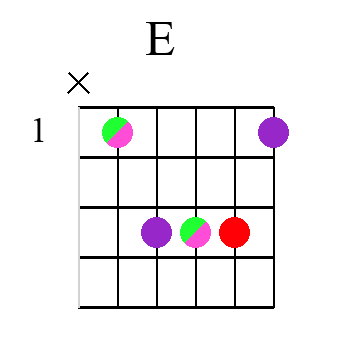

KeyboardInterrupt: Interrupted by user

In [10]:
# @title main loop
def contains_invalid_none_sequence(fingers):
    found_non_none = False
    seen_none_after_non_none = False

    for finger in fingers:
        if finger is not None:
            if seen_none_after_non_none:
                # Found a non-None after a None which was after a non-None
                return True
            found_non_none = True
        else:
            if found_non_none:
                # Mark that we've seen a None after a non-None
                seen_none_after_non_none = True

    return False

def get_user_input():
    while True:
        user_input = input("do you like this guitar chord? (y/n): ").strip().lower()

        if user_input in ["y", "n"]:
            return user_input
        else:
            print("y or n only please.")


def main():
    # Connect to the SQLite database
    conn = sqlite3.connect('/content/creating_chord_collection/my_database.db')
    cursor = conn.cursor()

    # Select records with NULL status
    cursor.execute("SELECT * FROM FINGER_ASCENDING WHERE STATUS IS NULL")
    records = cursor.fetchall()

    for record in records:
        id, _, *fingers = record
        # Convert finger positions from string to int, handling None values
        fingers = [int(finger) if finger is not None else None for finger in fingers]

        # Check if the list contains a 1 and does not have invalid None sequence
        if 1 not in fingers or contains_invalid_none_sequence(fingers):
            # Automatically reject and update the record, then continue to the next record
            cursor.execute("UPDATE FINGER_ASCENDING SET STATUS = 'rejected' WHERE ID = ?", (id,))
            conn.commit()
            continue

        print(f"Chord Fingers: {fingers}")

        chord = GuitarChord('E', '', transposable_figures, finger_ascending=fingers, starting_fret=1)

        # Repeat the process with ShortChordBuilder
        builder = ShortBuilder()
        director = Director(builder)
        director.build_chord(chord)
        director.display_image()  # Directly display the image

        user_input = get_user_input()

        # Update record based on user input
        new_status = 'accepted' if user_input == 'y' else 'rejected'
        cursor.execute("UPDATE FINGER_ASCENDING SET STATUS = ? WHERE ID = ?", (new_status, id))
        conn.commit()

    # Close the database connection
    conn.close()

main()